In [1]:
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the IBD 16S data

In [2]:
otu = pd.read_csv("ibd_16s/RC2_16S_IBD_OTU.tsv.gz", delimiter="\t", compression='gzip')
otu = otu.set_index('SequenceID')
meta = pd.read_csv("ibd_16s/RC2_16S_IBD_metadata.tsv.gz", delimiter="\t", compression='gzip')
tax = pd.read_csv("ibd_16s/RC2_16S_IBD_taxadata.tsv.gz", delimiter="\t", compression='gzip')
tax = tax.set_index('SequenceID')

In [3]:
otu

,10565,10566,10567,10570,10572,10573,10574,10575,10576,10580,...,Parkes.Water.G.M878,Parkes.Water.H.M878,Parkes.Water.I.M878,Parkes.Water.J.M878,Parkes.Water.K.M878,Parkes.Water.L.M878,Parkes.Water.M.M878,Parkes.Water.N.M879,Parkes.Water.O.M880,Parkes.Water.P.M881
SequenceID,,,,,,,,,,,,,,,,,,,,,
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,162,2088,2671,3023,0,1140,2130,2356,0,0,...,0,7,0,0,0,0,0,0,0,0
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,239,631,1229,2131,0,371,731,1719,0,0,...,0,0,0,0,52,0,0,0,0,0
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,38,1552,5784,33,0,1140,3651,5006,0,0,...,0,0,0,0,0,0,0,0,0,0
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,249,64,342,1761,0,130,123,329,0,10863,...,0,0,0,0,0,0,0,0,0,0
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,0,2364,0,0,0,618,0,0,0,0,...,0,2,0,0,62,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAGCGTGGGGAGCGAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGTGGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTCAAGCTAGAGTGCAGGAGAAGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTGGGGATCAAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
otu[['33917', '33866']]

,33917,33866
SequenceID,,
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,559,1788
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,640,231
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,1295,104
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,43,153
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,0,231
...,...,...
GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,0,0
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAGCGTGGGGAGCGAAC,0,0
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGTGGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTCAAGCTAGAGTGCAGGAGAAGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTGGGGATCAAAC,0,0


In [5]:
wehave = set()
with open("freezer.txt", 'r') as f:
    for l in f:
        l = l.strip()
        if l:
            wehave.add(int(l))
wehave

{33855,
 33856,
 33857,
 33858,
 33859,
 33860,
 33861,
 33862,
 33863,
 33865,
 33866,
 33867,
 33868,
 33869,
 33870,
 33871,
 33872,
 33877,
 33878,
 33879,
 33880,
 33881,
 33882,
 33883,
 33884,
 33887,
 33888,
 33890,
 33891,
 33893,
 33895,
 33896,
 33897,
 33898,
 33901,
 33902,
 33906,
 33907,
 33908,
 33909,
 33910,
 33911,
 33913,
 33914,
 33915,
 33916,
 33917,
 33922,
 33924,
 33925,
 33926,
 33929,
 33931,
 33932,
 33936,
 33937,
 33939,
 33940,
 33941,
 33942,
 33943,
 33947,
 33949,
 33950,
 33951,
 33953,
 33954,
 33955,
 33957,
 33958,
 33959,
 33960,
 33961,
 33963,
 33964,
 33965,
 33966,
 33968,
 33969,
 33970,
 33972,
 33973,
 33974,
 33975,
 33976,
 33978,
 33979,
 33980,
 33981,
 33982,
 33983,
 33984,
 33988,
 33989,
 33991,
 33992,
 33993,
 33995,
 33996,
 33997,
 33998,
 33999,
 34000,
 34001,
 34002,
 34003,
 34006,
 34007,
 34008,
 34009,
 34010,
 34011,
 34012,
 34013,
 34015,
 34018,
 34019,
 34020,
 34022,
 34024,
 34027,
 34028,
 34029,
 34030,
 34031,


In [6]:
mv = pd.read_csv('microvirus_contig_count_table.tsv.gz', delimiter="\t", compression='gzip')
mvshort = mv[['sample', 'contig', 'reads']]
mvsp = mvshort.pivot(index='contig', columns='sample', values='reads')
mvsp.columns = mvsp.columns.map(str)
mvsp

sample,7544,7547,7548,7550,7553,7554,7556,7559,7561,7562,...,38202,38203,38204,38205,38206,38207,38208,38209,38210,38211
contig,,,,,,,,,,,,,,,,,,,,,
contig_101611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_103502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_105525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_108107,NaN,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,15.0,NaN,NaN,56.0,6.0,NaN,NaN,1.0
contig_113981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
contig_81756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_89787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_90001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
jn = pd.concat([otu, mvsp])
jn

,10565,10566,10567,10570,10572,10573,10574,10575,10576,10580,...,38111,38117,38120,38132,38172,38177,38181,38182,38200,38211
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,162.0,2088.0,2671.0,3023.0,0.0,1140.0,2130.0,2356.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,239.0,631.0,1229.0,2131.0,0.0,371.0,731.0,1719.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,38.0,1552.0,5784.0,33.0,0.0,1140.0,3651.0,5006.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,249.0,64.0,342.0,1761.0,0.0,130.0,123.0,329.0,0.0,10863.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,0.0,2364.0,0.0,0.0,0.0,618.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
contig_81756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_89787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_90001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contig_96771,NaN,514.0,65.0,1.0,NaN,42.0,22.0,73.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
corrln = jn.T.corr()
corrln

,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGTCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC,...,contig_50786,contig_57831,contig_58782,contig_58925,contig_64930,contig_81756,contig_89787,contig_90001,contig_96771,contig_99267
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,1.000000,0.156398,0.507410,0.157793,0.046198,0.409191,0.201086,0.272697,0.321753,-0.064228,...,0.682950,-0.064659,-0.229646,NaN,0.062456,0.019288,-0.350199,0.118178,-0.045554,-0.011864
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,0.156398,1.000000,0.272380,0.143553,0.002277,0.273302,0.001902,-0.019606,0.188682,0.084293,...,-0.361035,0.120796,0.094210,NaN,-0.156445,-0.115241,-0.699547,-0.220037,-0.048600,-0.003671
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,0.507410,0.272380,1.000000,0.045010,0.056856,0.470582,0.093596,0.147869,0.209630,-0.072946,...,0.933312,0.099178,-0.005893,NaN,-0.129962,-0.167912,-0.080444,-0.173028,-0.049049,-0.024951
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGC

In [9]:
shortco = corrln[list(otu.index)].iloc[otu.shape[0]:]
shortco

,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAAACCATGGGCTCAACCCATGAATTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGATGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGTCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGCATGGGTAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATGTCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,GTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGATAACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAAC,GGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC,...,GTAGGGGACAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGATGCAAGTCTGAAGTGAAATACCCGGGCTCAACCTGGGAACTGCTTTGGAAACTGTATGGCTAGAGTGCTGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACGGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAAGGCAAGTCTGATGTGAAAACCTAGGGCTTAACCCTGGGACTGCATTGGAAACTGTCTGGCTCGAGTGCCGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAAC,GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGGGTATTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGTATCCTCGAGTGCAGCAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,GTAGGTGGCGAGCGTTATCCGGAATTATTGGGTGCAAAGGGTGCGTAGGCGGGATGTAAAGTCAGATGTGAAATGCCGCGGCTCAACCGCGGAGCTGCATTTGAAACTTATGTTCTTGAGTGAAGTAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCGGTGGCGAAGGCGGCTTACTGGGCTTAGACTGACGCTGAGGCACGAAAGTGTGGGGAGCAAAC,GGAGGATGCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACACAGAACACCGATTGCGAAGGCAGCTTACAAATCTATATCGGACGCTGAGGCACGAAAGCGTGGGGAGCAAAC,GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,GGAGGATGCGAGCGTTATCCGGATTTA

In [10]:
shortco.to_csv('microviridae_correlations.tsv.gz', sep="\t", compression='gzip')

Find the maximum value for each element in the list. We get the contig id, the sequence id, and the correlation

In [11]:
tax

,Kingdom,Phylum,Class,Order,Family,Genus,Species
SequenceID,,,,,,,
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,prausnitzii
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,prausnitzii
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,NaN
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,copri
...,...,...,...,...,...,...,...
GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Sutterella,NaN
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAGCGTGGGGAGCGAAC,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Barnesiella,NaN
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGTGGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTCAAGCTAGAGTGCAGGAGAAGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTGGGGATCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NaN,NaN


In [12]:
tax.loc['GTAGGGAGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTGCGTAGGCGGCTTTGCAAGTCAGATGTGAAATCTATGGGCTCAACCCATAAACTGCATTTGAAACTGTAGAGCTTGAGTGAAGTAGAGGCAGGCGGAATTCCCCGTGTAGCGGTGAAATGCGTAGAGATGGGGAGGAACACCAGTGGCGAAGGCGGCCTGCTGGGCTTTAACTGACGCTGAGGCACGAAAGCGTGGGTAGCAAAC']

Kingdom           Bacteria
Phylum          Firmicutes
Class           Clostridia
Order        Clostridiales
Family     Ruminococcaceae
Genus         Ruminococcus
Species             bromii
Name: GTAGGGAGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTGCGTAGGCGGCTTTGCAAGTCAGATGTGAAATCTATGGGCTCAACCCATAAACTGCATTTGAAACTGTAGAGCTTGAGTGAAGTAGAGGCAGGCGGAATTCCCCGTGTAGCGGTGAAATGCGTAGAGATGGGGAGGAACACCAGTGGCGAAGGCGGCCTGCTGGGCTTTAACTGACGCTGAGGCACGAAAGCGTGGGTAGCAAAC, dtype: object

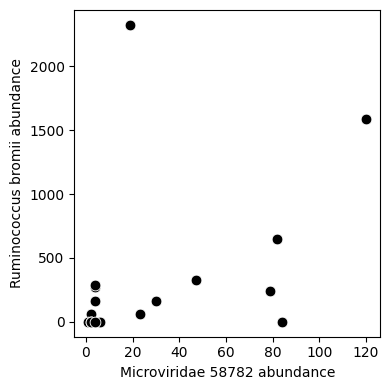

In [13]:
fig, ax = plt.subplots(figsize=(4,4))
xl = 'contig_58782'
yl = 'GTAGGGAGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGTGCGTAGGCGGCTTTGCAAGTCAGATGTGAAATCTATGGGCTCAACCCATAAACTGCATTTGAAACTGTAGAGCTTGAGTGAAGTAGAGGCAGGCGGAATTCCCCGTGTAGCGGTGAAATGCGTAGAGATGGGGAGGAACACCAGTGGCGAAGGCGGCCTGCTGGGCTTTAACTGACGCTGAGGCACGAAAGCGTGGGTAGCAAAC'
tmp = jn.loc[[xl, yl]].T
s = sns.scatterplot(x=xl, y=yl, ax=ax, data=tmp, legend=None, s=60, marker='o', color='k')
l = s.set_xlabel('Microviridae 58782 abundance')
l = s.set_ylabel('Ruminococcus bromii abundance')
plt.tight_layout()
fig.savefig("microviridae58782.png")

Row 1
Row 2
Row 3
Row 4
Row 5
Row 6
Row 7
Row 8
Row 9
Row 10
Row 11


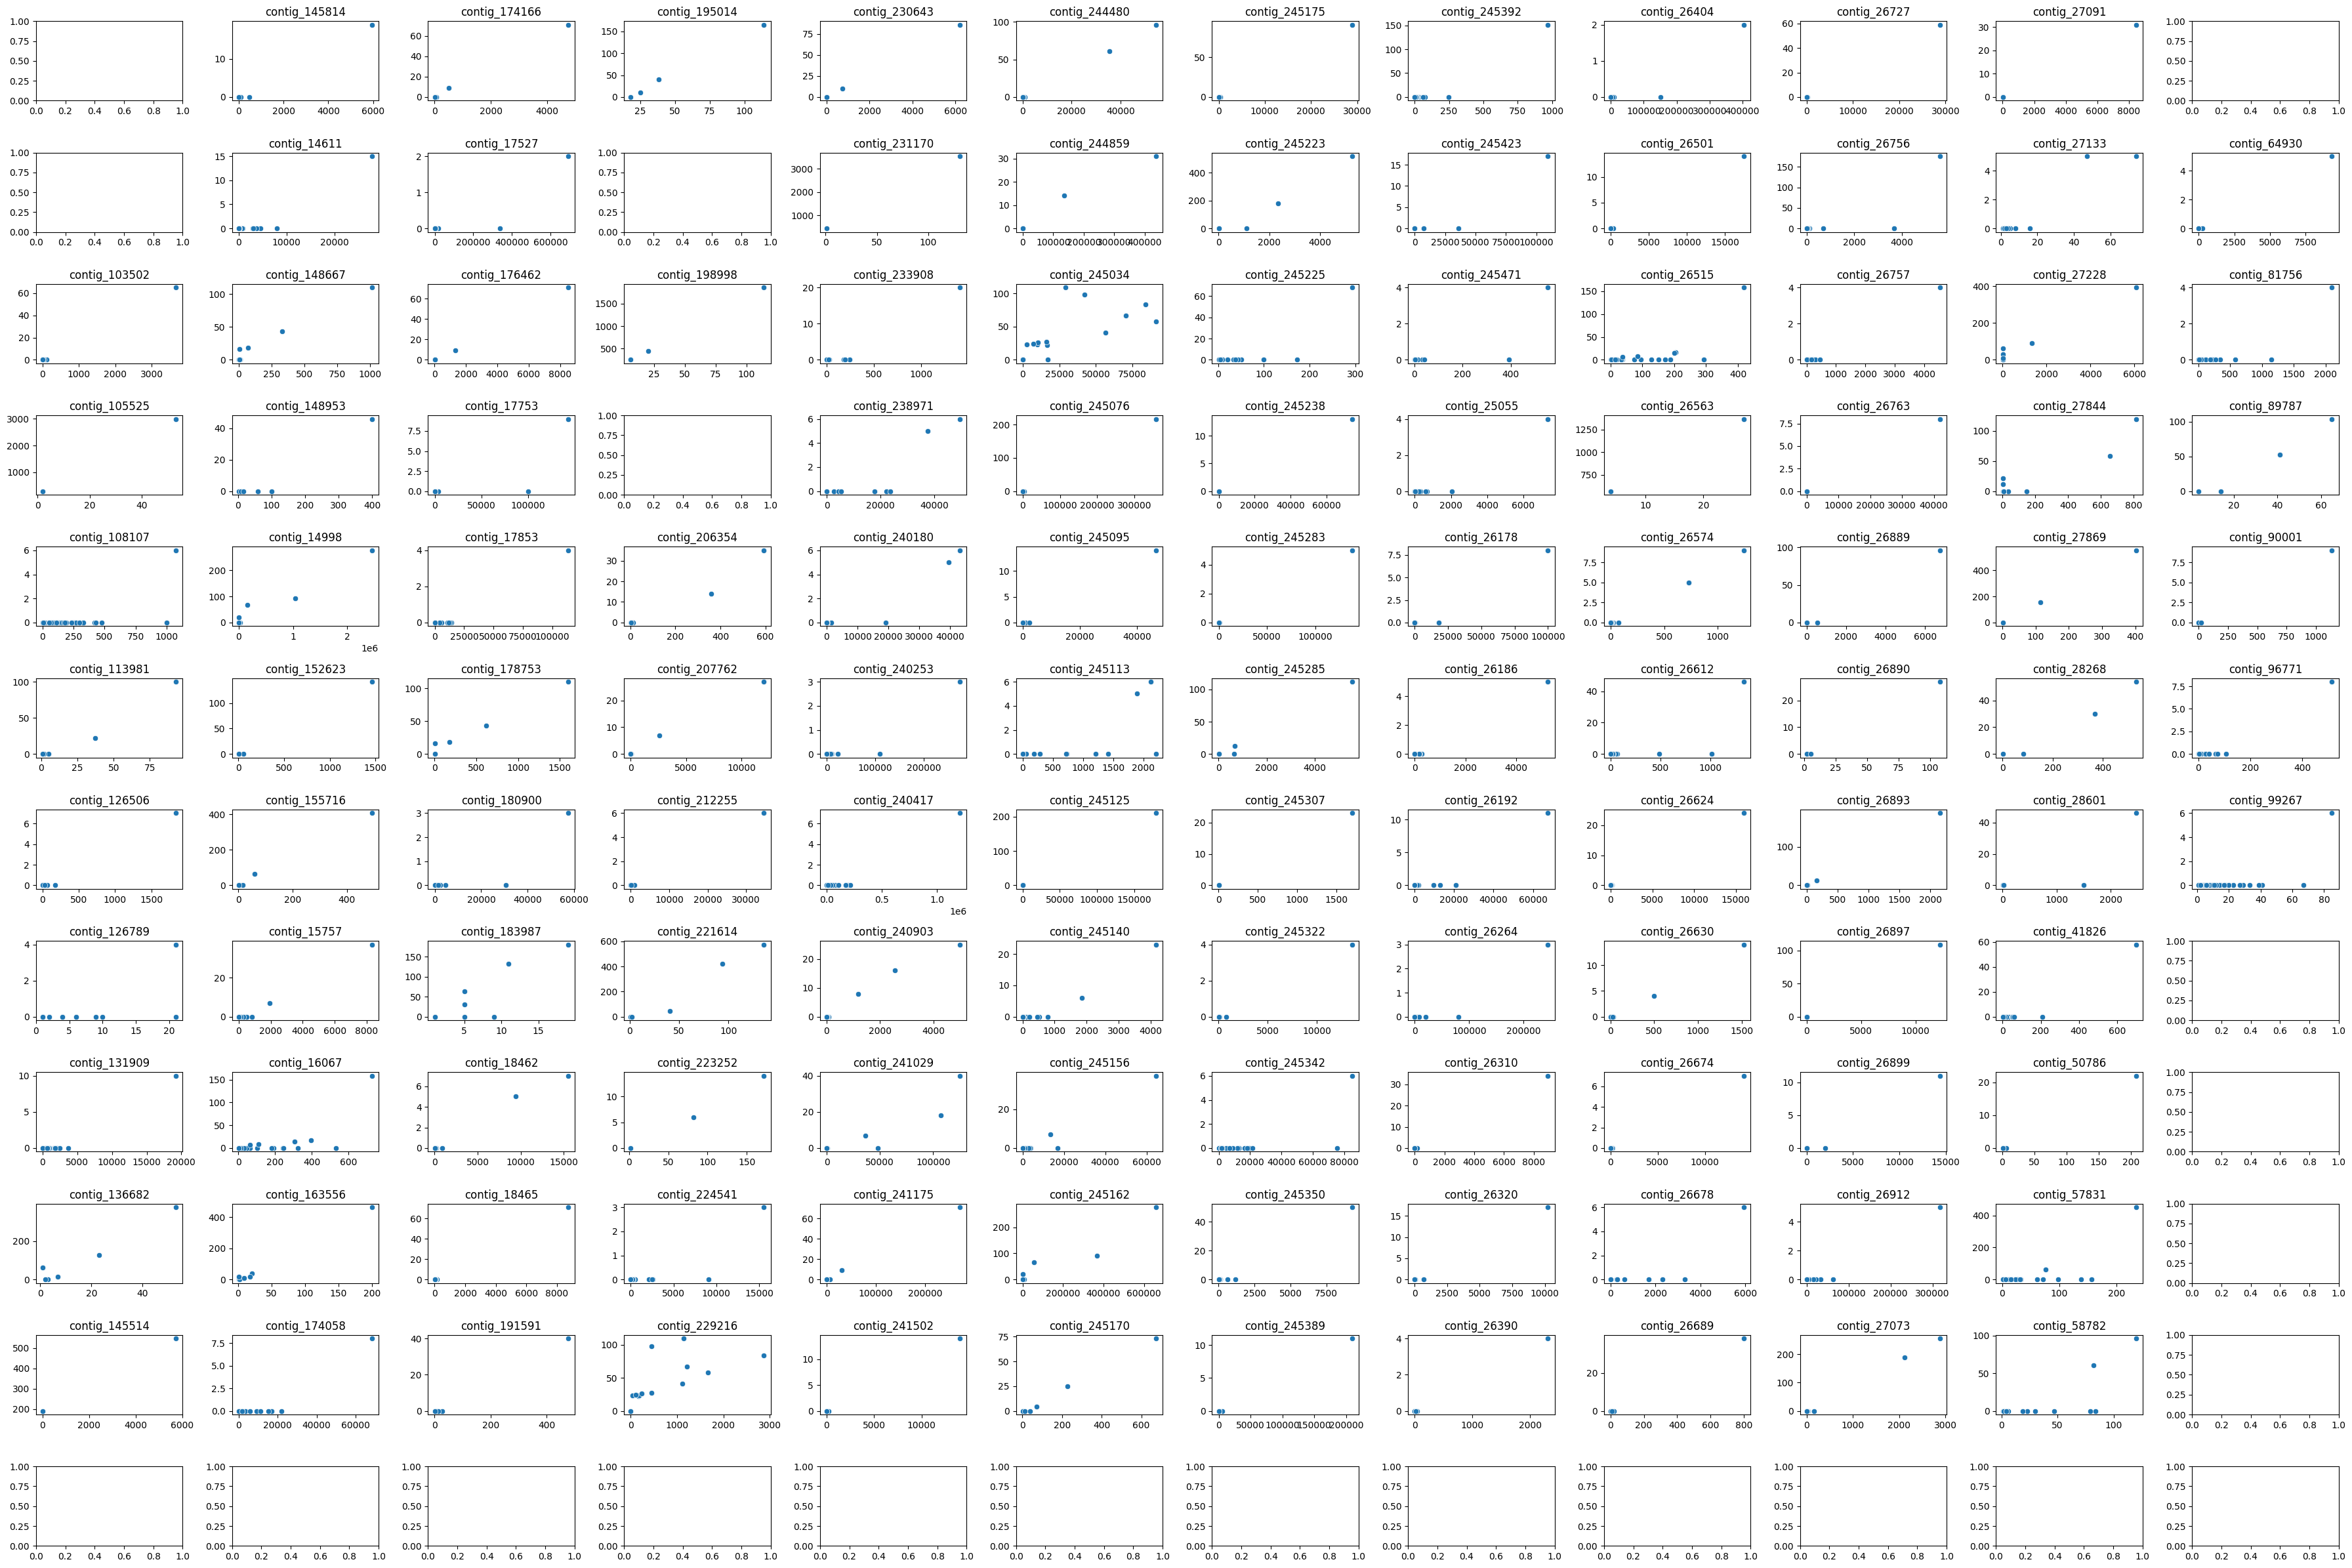

In [14]:
fig, ax = plt.subplots(figsize=(36, 24), nrows=12, ncols=12, sharey=False, sharex=False)

ix = 0
iy = 0

for tple in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    xl = tple[0]
    yl = tple[1]
    pearson = tple[2]
    ix += 1
    if ix == 11:
        ix = 0
        iy += 1
        print(f"Row {iy}", file=sys.stderr)
    if str(xl) == 'nan'  or  str(yl) == 'nan' or str(pearson) == 'nan':
        continue
    tmp = jn.loc[[xl, yl]].T
    # reject anything with less than 10 points
    #if tmp.iloc[0].count() < 10:
    #    continue
    s = sns.scatterplot(x=xl, y=yl, data=tmp, ax=ax[ix, iy], legend=None)
    l = s.set_xlabel('')
    l = s.set_ylabel('')
    s.set_title(xl)
plt.tight_layout()
fig.savefig("microviridae.png")

In [22]:
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    if tpl[0] == 'contig_229216':
        print(f"{tpl[0]} : {tpl[1]} : {tpl[2]}")
        print(tax.loc[tpl[1]])

contig_229216 : GAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACATGTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGTGTGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGTTAACTGACACTGAGGCTCGAAAGTGTGGGTATCAAA : 0.7508971572767826
Kingdom          Bacteria
Phylum      Bacteroidetes
Class         Bacteroidia
Order       Bacteroidales
Family     Bacteroidaceae
Genus         Bacteroides
Species               NaN
Name: GAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACATGTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGTGTGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGTTAACTGACACTGAGGCTCGAAAGTGTGGGTATCAAA, dtype: object


In [25]:
wanted = ['contig_58782', 'contig_245034', 'contig_229216']
for tpl in zip(shortco.index, shortco.idxmax(axis=1), shortco.max(axis=1)):
    if tpl[0] in wanted:
        print(f"{tpl[0]} : {tpl[1]} : {tpl[2]}")
        print(tax.loc[tpl[1]])
        print()

contig_229216 : GAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACATGTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGTGTGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGTTAACTGACACTGAGGCTCGAAAGTGTGGGTATCAAA : 0.7508971572767826
Kingdom          Bacteria
Phylum      Bacteroidetes
Class         Bacteroidia
Order       Bacteroidales
Family     Bacteroidaceae
Genus         Bacteroides
Species               NaN
Name: GAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACATGTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGTGTGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGTTAACTGACACTGAGGCTCGAAAGTGTGGGTATCAAA, dtype: object

contig_245034 : GAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACATGTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGTGTGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGTTAACTGACACTGAGGCTCGAAAGTGTGGGTATCAAA : 

In [20]:
tax

,Kingdom,Phylum,Class,Order,Family,Genus,Species
SequenceID,,,,,,,
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,prausnitzii
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,prausnitzii
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,NaN
GGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGAGCGCAACTGACGCTGAAGCTCGAAAGTGCGGGTATCGAAC,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,copri
...,...,...,...,...,...,...,...
GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Sutterellaceae,Sutterella,NaN
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAGCGTGGGGAGCGAAC,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Barnesiella,NaN
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGTGGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTCAAGCTAGAGTGCAGGAGAAGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTGGGGATCAAAC,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NaN,NaN


# What do we have at Flinders?

In [50]:
t='GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC'
s = fl_samples[0]
otu.at[t,s]

104

In [39]:
fl_samples = ['33866', '33917']
otu[fl_samples].sort_values(by=fl_samples[::-1], ascending=False)

,33866,33917
SequenceID,,
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,104,1295
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGATTGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,0,1162
GGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCCTGCTAAGCTGCAACTGACATTGAGGCTCGAAAGTGTGGGTATCAAAC,231,640
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGACGGGAGATTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGTTTCCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACCCCGATTGCGAAGGCAGCTTGCTAAACTGTAACTGACGTTCATGCTCGAAAGTGTGGGTATCAAAC,0,622
GTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAAC,1788,559
...,...,...
GTAGGTCACAAGCGTTGCCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCCCGGGCTCAACCTGGGAATTGCATATATGACTGCAGGACTTGAGTTTGTCAGAGGAGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGTGGAAGAACACCGATGGCGAAGGCAGCCCTCTGGGACATGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAAC,0,0
GGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCACGCCAAGTCAGCGGTGAAATTTCCGGGCTCAACCCGGAGTGTGCCGTTGAAACTGGCGAGCTAGAGTACACAAGAGGCAGGCGGAATGCGTGGTGTAGCGGTGAAATGCTTAGATATCACACAGAACACCGATTGCGAAGGCAGCTTTCCAAGCTATTACTGACGCTGAGGCACGAAAGCGTGGGGAGCGAAC,0,0
GTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGTGGCAAGTCTGAAGTGAAAACCCAGGGCTCAACCCTGGGACTGCTTTGGAAACTGTCAAGCTAGAGTGCAGGAGAAGTAAGTGGAATTCCTAGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCTTACTAAACCATAACTGACACTGAAGCACGAAAGCGTGGGGATCAAAC,0,0


In [58]:
for idx in 0, 1:
    print(f"\nGenus species present in {fl_samples[idx]} : (number of 16S reads)")
    for t in otu[fl_samples].sort_values(by=fl_samples[idx], ascending=False).index[0:10]:
        sp = tax.loc[t].Species
        if str(sp) == 'nan':
            sp = 'spp.'
        print(f"\t{tax.loc[t].Genus} {sp} : {otu.at[t,fl_samples[idx]]}")


Genus species present in 33866 : (number of 16S reads)
	Faecalibacterium prausnitzii : 1788
	Faecalibacterium spp. : 507
	Faecalibacterium prausnitzii : 436
	Alloprevotella spp. : 353
	Dialister invisus : 294
	Bacteroides dorei : 233
	Prevotella copri : 231
	Bacteroides spp. : 231
	Oscillibacter spp. : 195
	Faecalibacterium spp. : 194

Genus species present in 33917 : (number of 16S reads)
	Faecalibacterium prausnitzii : 1295
	Faecalibacterium prausnitzii : 1162
	Bacteroides spp. : 640
	Bacteroides coprocola : 622
	Faecalibacterium prausnitzii : 559
	nan spp. : 366
	Faecalibacterium prausnitzii : 310
	Roseburia spp. : 300
	nan spp. : 255
	Faecalibacterium spp. : 223
